# Summary of the Jupyter Notebook

This Jupyter Notebook provides a comprehensive analysis of a financial dataset (`datasets/financials.csv`) containing sales, profit, and related metrics for various products across multiple countries and years. The workflow includes:

- **Data Import & Cleaning:** The dataset is loaded and cleaned, with columns standardized and monetary values converted to numeric types.
- **Exploratory Data Analysis:** Descriptive statistics and data info are displayed to understand the structure and summary of the dataset.
- **Country-Level Analysis:** 
    - Sales and profit are aggregated by country.
    - Visualizations include bar charts (with country flag images) and interactive Plotly maps to highlight sales and profit distribution.
    - Special highlighting is used for countries with the maximum and minimum profit.
- **Yearly and Segment/Product Analysis:** 
    - Sales and profit are broken down by year, segment, and product.
    - Comparative bar charts show trends for 2013 and 2014.
- **Gross Sales Analysis:** 
    - Gross sales are summarized and visualized by country and year.
- **Product Sales by Country:** 
    - The total number of products sold per country is calculated and visualized.
- **Discount Band Analysis:** 
    - The distribution of countries across different discount bands is summarized.

The notebook uses a variety of visualization libraries (Matplotlib, Seaborn, Plotly) and incorporates images for enhanced data storytelling. The variables and dataframes created throughout the notebook support in-depth, multi-dimensional analysis of sales and profitability trends.

### Downloading the libraries
* pandas
* numpy
* matplotlib.pyplot
* OffsetImage and AnnotationBboxmat from plotlib.offsetbox 
* Image from PIL
* seaborn
* plotly.express
* plotly.graph_objects
* plotly.figure_factory
* FuncFormatter from matplotlib.ticker 
 

In [39]:
# Downloading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from matplotlib.ticker import FuncFormatter


In [40]:
file_path = 'datasets/financials.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip().str.replace(' ', '_')

df['Discounts'] = df['Discounts'].str.replace('$', '',regex=False)
df['Discounts'] = pd.to_numeric(df['Discounts'], errors='coerce')
df['Discounts'] = df['Discounts'].fillna(0)
df


,Segment,Country,Product,Discount_Band,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Date,Month_Number,Month_Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,1/1/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,1/1/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,6/1/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,6/1/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,6/1/2014,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,0.00,631125.00,618750.0,12375.00,3/1/2014,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,0.00,139230.00,136500.0,2730.00,10/1/2014,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,0.00,8139.60,6840.0,1299.60,2/1/2014,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,4/1/2014,4,April,2014


In [41]:
df.describe()

,Units_Sold,Manufacturing_Price,Sale_Price,Gross_Sales,Discounts,Sales,COGS,Profit,Month_Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,695.000000,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,114.625671,1.696091e+05,145475.211429,24307.485309,7.900000,2013.750000
std,867.427859,108.602612,136.775515,2.542623e+05,249.224502,2.367263e+05,203865.506118,42865.115657,3.377321,0.433322
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,0.000000,1.592800e+04,7490.000000,2929.320000,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,0.000000,3.554020e+04,22506.250000,9297.000000,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,0.000000,2.610775e+05,245607.500000,22777.500000,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,983.750000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Segment              700 non-null    object 
 1   Country              700 non-null    object 
 2   Product              700 non-null    object 
 3   Discount_Band        700 non-null    object 
 4   Units_Sold           700 non-null    float64
 5   Manufacturing_Price  700 non-null    int64  
 6   Sale_Price           700 non-null    int64  
 7   Gross_Sales          700 non-null    float64
 8   Discounts            700 non-null    float64
 9   Sales                700 non-null    float64
 10  COGS                 700 non-null    float64
 11  Profit               695 non-null    float64
 12  Date                 700 non-null    object 
 13  Month_Number         700 non-null    int64  
 14  Month_Name           700 non-null    object 
 15  Year                 700 non-null    int

In [43]:
df_country_sales = df.groupby('Country').agg({'Discounts': 'sum', 'Sales': 'sum'}).reset_index()
df_country_sales['Discounts'] = df_country_sales['Discounts'].astype(int)
df_country_sales['Sales'] = df_country_sales['Sales'].apply(lambda x: '${:,.0f}'.format(x))
df_country_sales

,Country,Discounts,Sales
0,Canada,11189,"$24,887,655"
1,France,14767,"$24,354,172"
2,Germany,15939,"$23,505,341"
3,Mexico,20076,"$20,949,352"
4,United States of America,18265,"$25,029,830"


In [44]:
df_country_sales  = df.groupby('Country').agg({'Sales': 'sum'}).reset_index()
df_country_sales = df_country_sales.sort_values(by='Sales', ascending=True)
df_country_sales['Sales'] = df_country_sales['Sales'].apply(lambda x: '${:,.0f}'.format(x))
# Display the results grouped dataframe
df_country_sales

,Country,Sales
3,Mexico,"$20,949,352"
2,Germany,"$23,505,341"
1,France,"$24,354,172"
0,Canada,"$24,887,655"
4,United States of America,"$25,029,830"


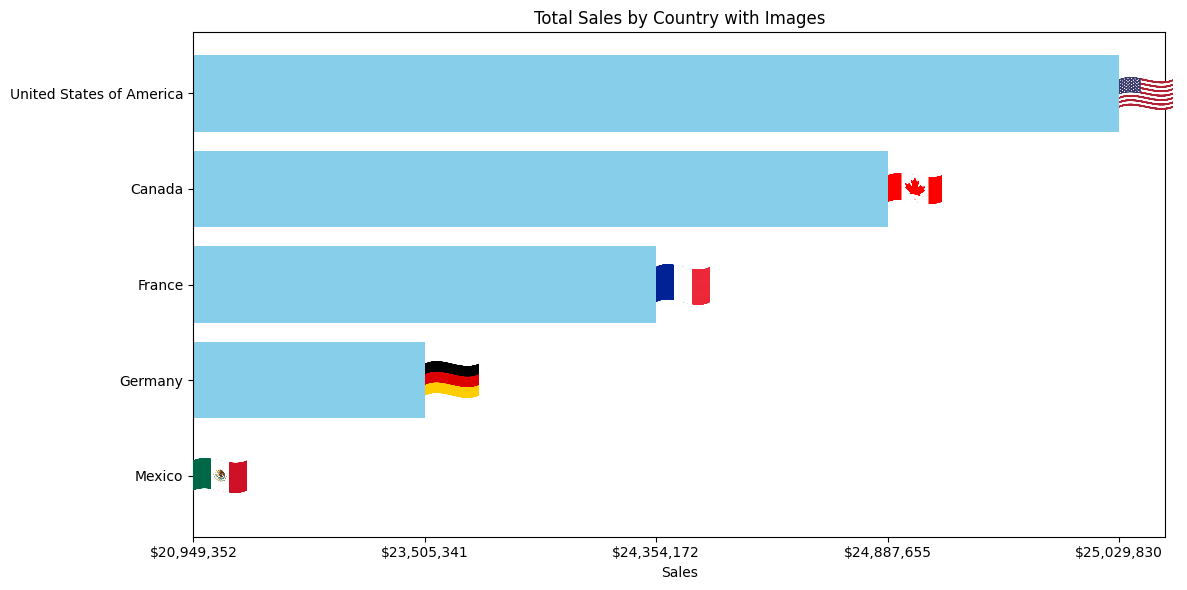

In [45]:
# Create a bar plot using Plotly Express
# File paths for country images (replace with actual paths)
country_images = {
    "United States of America": "images/flags/usa.png",
    "Canada": "images/flags/canada.png",
    "Germany": "images/flags/germany.png",
    "France": "images/flags/france.png",
    "Mexico": "images/flags/mexico.png"
    # Add more countries and their image paths
}

# Creating the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_country_sales['Country'], df_country_sales['Sales'], color='skyblue')

# Adding the images at the end of each bar
for bar, country in zip(bars, df_country_sales['Country']):
    if country in country_images:
        img_path = country_images[country]
        img = Image.open(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                            frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)
# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_title('Total Sales by Country with Images')
plt.tight_layout()
plt.show()

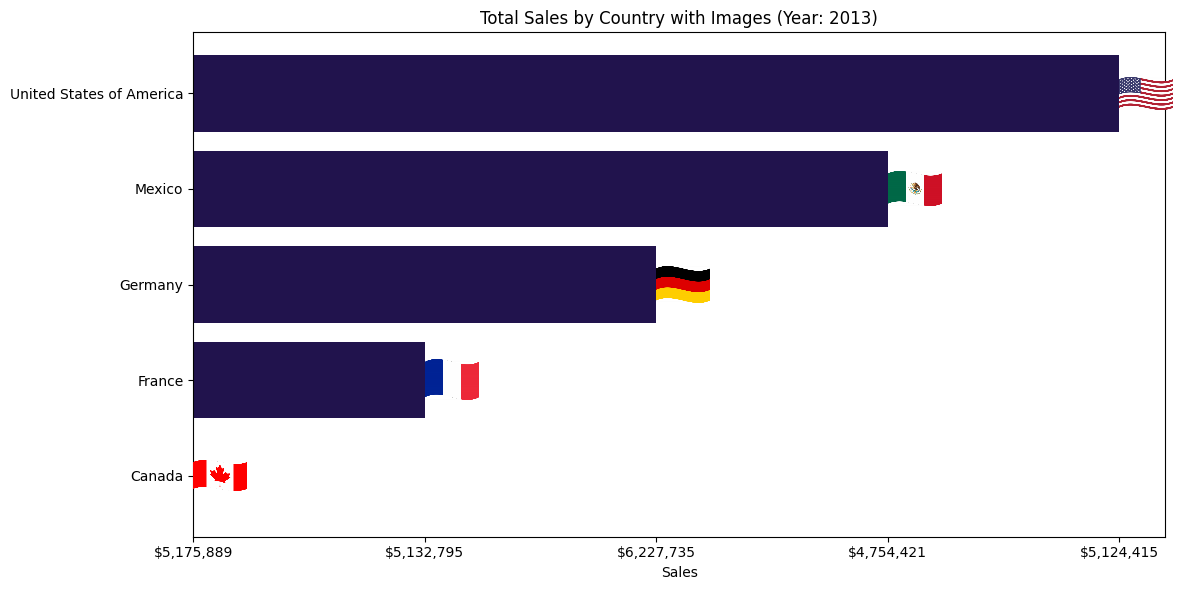

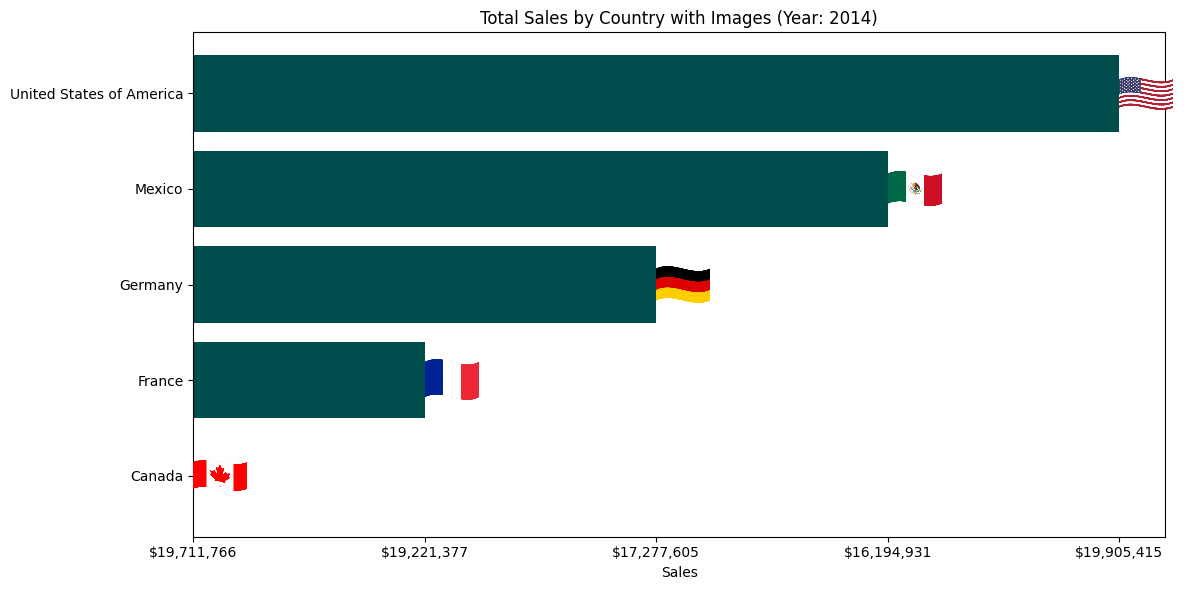

In [46]:
# Filtering the dataframe for 2013 and 2014 sales
df_sales_2013 = df[df['Year'] == 2013].groupby('Country').agg({'Sales': 'sum'}).reset_index()
df_sales_2014 = df[df['Year'] == 2014].groupby('Country').agg({'Sales': 'sum'}).reset_index()

# Formating the sales values for better readability
df_sales_2013['Sales'] = df_sales_2013['Sales'].apply(lambda x: '${:,.0f}'.format(x))
df_sales_2014['Sales'] = df_sales_2014['Sales'].apply(lambda x: '${:,.0f}'.format(x))

# Creating the horizontal bar chart for 2013
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2013['Country'], df_sales_2013['Sales'], color='#21134D')

# Adding images to the end of each bar
for bar, country in zip(bars, df_sales_2013['Country']):
    if country in country_images:
        img_path = country_images[country]
        img = Image.open(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                            frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_title('Total Sales by Country with Images (Year: 2013)')
plt.tight_layout()
plt.show()

# Create the horizontal bar chart for 2014
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2014['Country'], df_sales_2014['Sales'], color='#004D4D')

# Add images to the end of each bar
for bar, country in zip(bars, df_sales_2014['Country']):
    if country in country_images:
        img_path = country_images[country]
        img = Image.open(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                            frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_title('Total Sales by Country with Images (Year: 2014)')
plt.tight_layout()
plt.show()


In [47]:
# Creating a bar plot using Plotly Express
fig = px.bar(df_country_sales, x='Country', y='Sales', title='Total Sales by Country', color='Sales')
fig.update_layout(xaxis_title='Country', yaxis_title='Total Sales', xaxis_tickangle=-45)
fig.show()

In [48]:
# Creating a map chart using Plotly Express
fig = px.choropleth(df_country_sales, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Sales', 
                    title='Sales by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

In [49]:
df_country_profit  = df.groupby('Country').agg({'Profit': 'sum'}).reset_index()
df_country_profit = df_country_profit.sort_values(by='Profit', ascending=True)

# Displaying the results grouped dataframe
df_country_profit['Profit'] = df_country_profit['Profit'].apply(lambda x: f"${x:,.2f}")
df_country_profit

,Country,Profit
3,Mexico,"$2,907,523.11"
4,United States of America,"$2,995,540.68"
0,Canada,"$3,529,228.89"
2,Germany,"$3,680,388.82"
1,France,"$3,781,020.79"


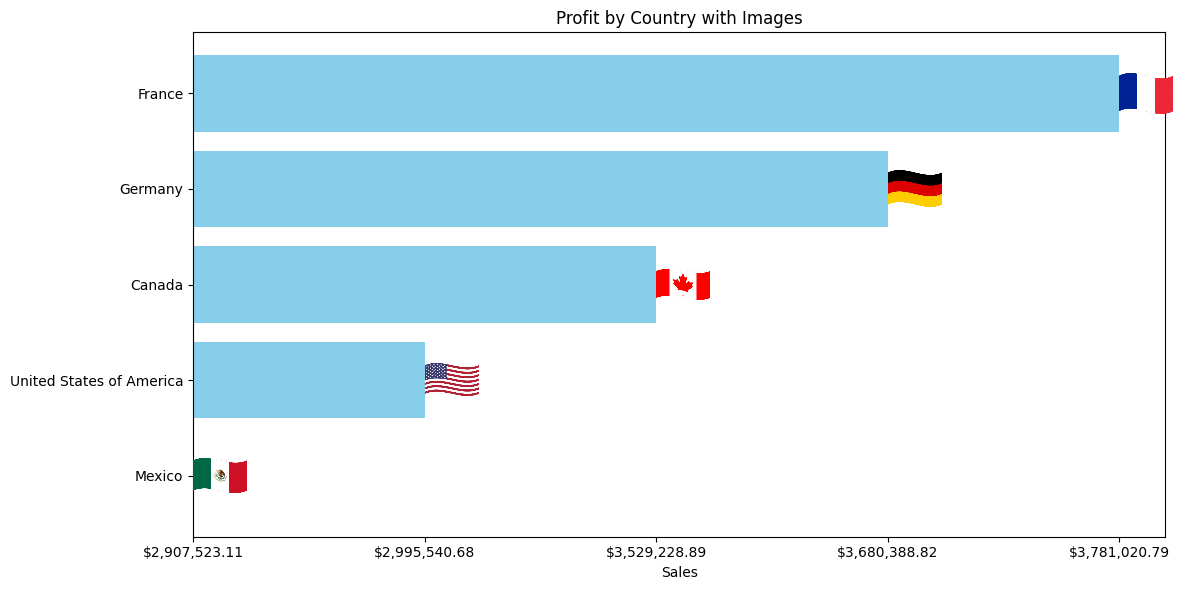

In [50]:
# Creating a bar plot for Profit based on the countries using Plotly Express

# Creating the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_country_profit['Country'], df_country_profit['Profit'], color='skyblue')

# Adding images to the end of each bar
for bar, country in zip(bars, df_country_profit['Country']):
    if country in country_images:
        img_path = country_images[country]
        img = Image.open(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                            frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)

# Adding labels and title
ax.set_xlabel('Sales')
ax.set_title('Profit by Country with Images')
plt.tight_layout()
plt.show()

In [51]:
# Creating a map chart using Plotly Express
fig = px.choropleth(df_country_profit, 
                    locations='Country', 
                    locationmode='country names', 
                    color='Profit', 
                    title='Profit by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(geo=dict(showframe=False, showcoastlines=True))
fig.show()

In [52]:
# Finding countries with the minimum and maximum profit
max_profit_country = df_country_profit.loc[df_country_profit['Profit'].idxmax(), 'Country']
min_profit_country = df_country_profit.loc[df_country_profit['Profit'].idxmin(), 'Country']

# Creating a new column for highlighting
df_country_profit['Highlight'] = 'Normal'
df_country_profit.loc[df_country_profit['Country'] == max_profit_country, 'Highlight'] = 'Max Profit'
df_country_profit.loc[df_country_profit['Country'] == min_profit_country, 'Highlight'] = 'Min Profit'
df_country_profit

,Country,Profit,Highlight
3,Mexico,"$2,907,523.11",Min Profit
4,United States of America,"$2,995,540.68",Normal
0,Canada,"$3,529,228.89",Normal
2,Germany,"$3,680,388.82",Normal
1,France,"$3,781,020.79",Max Profit


In [53]:
# Creating a map chart using Plotly Express with highlighted countries

# Ensuring the Profit is numeric
df_country_profit['Profit'] = df_country_profit['Profit'].replace(r'[\$,]', '', regex=True).astype(float)
df_country_profit['Highlight'] = 'Normal'
df_country_profit.loc[df_country_profit['Profit'].idxmax(), 'Highlight'] = 'Max'
df_country_profit.loc[df_country_profit['Profit'].idxmin(), 'Highlight'] = 'Min'

# Customizing the color scale (updated colors for better contrast)
color_discrete_map = {
    'Max Profit': '#00FF00',  # Bright green for max
    'Min Profit': '#FF0000',  # Bright red for min
    'Normal': '#1C4E80'       # Neutral blue for others
}

# Creating figure with CORRECT hover template
fig = px.choropleth(
    df_country_profit,
    locations='Country',
    locationmode='country names',
    color_discrete_map=color_discrete_map,
    color='Highlight',
    hover_name='Country',
    hover_data={'Profit': ':.2f'}
)

# Updating the hover effect
fig.update_traces(
    hovertemplate="<b>%{location}</b><br>Profit: $%{customdata[0]:,.2f}<extra></extra>"
)

fig.show()

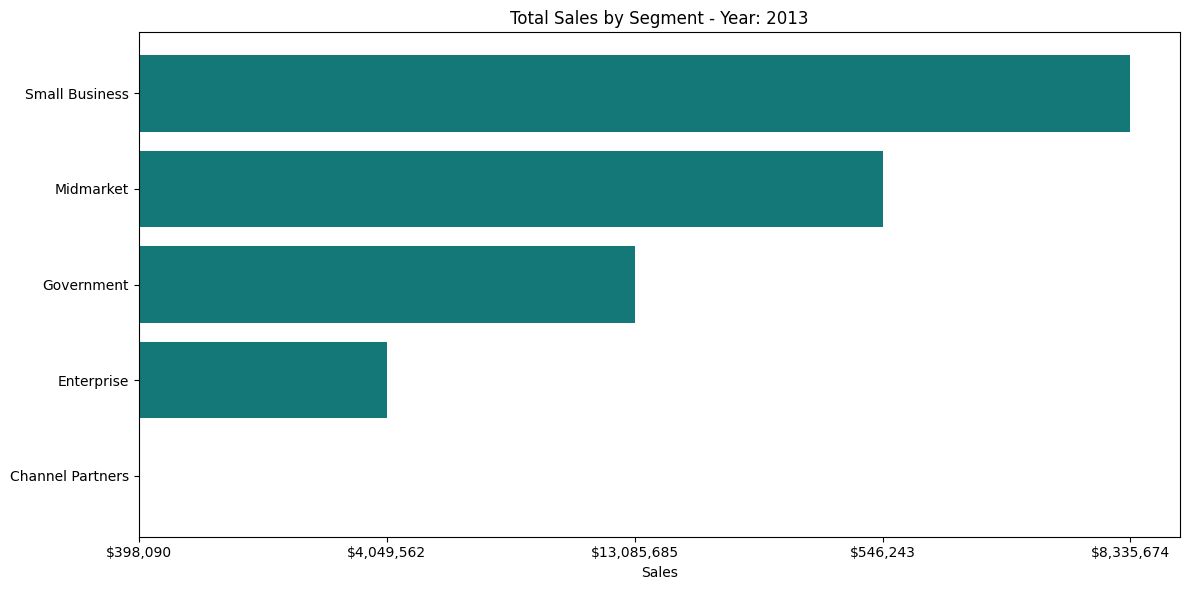

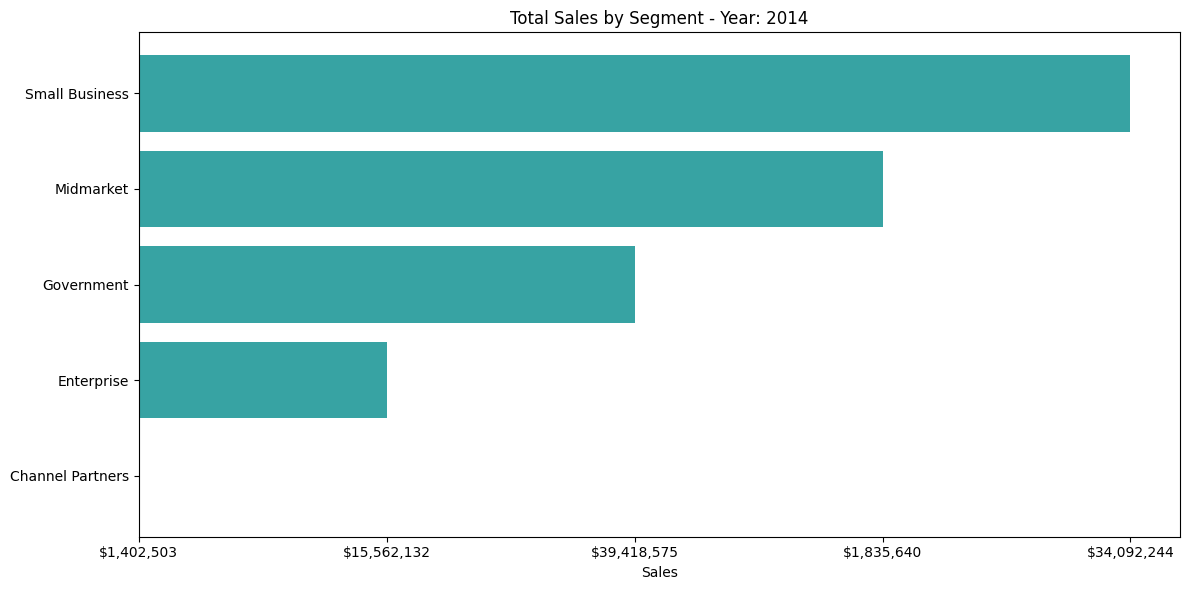

In [54]:
# Filtering the dataframe for 2013 and 2014 sales
df_sales_2013 = df[df['Year'] == 2013].groupby('Segment').agg({'Sales': 'sum'}).reset_index()
df_sales_2014 = df[df['Year'] == 2014].groupby('Segment').agg({'Sales': 'sum'}).reset_index()

# Formating the sales values for better readability
df_sales_2013['Sales'] = df_sales_2013['Sales'].apply(lambda x: '${:,.0f}'.format(x))
df_sales_2014['Sales'] = df_sales_2014['Sales'].apply(lambda x: '${:,.0f}'.format(x))

# Creating the horizontal bar chart for 2013
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2013['Segment'], df_sales_2013['Sales'], color='#147878')

# Adding the labels and title
ax.set_xlabel('Sales') 
ax.set_title('Total Sales by Segment - Year: 2013')
plt.tight_layout()
plt.show()

# Create the horizontal bar chart for 2014
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2014['Segment'], df_sales_2014['Sales'], color='#37A3A3')

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_title('Total Sales by Segment - Year: 2014')
plt.tight_layout()
plt.show()


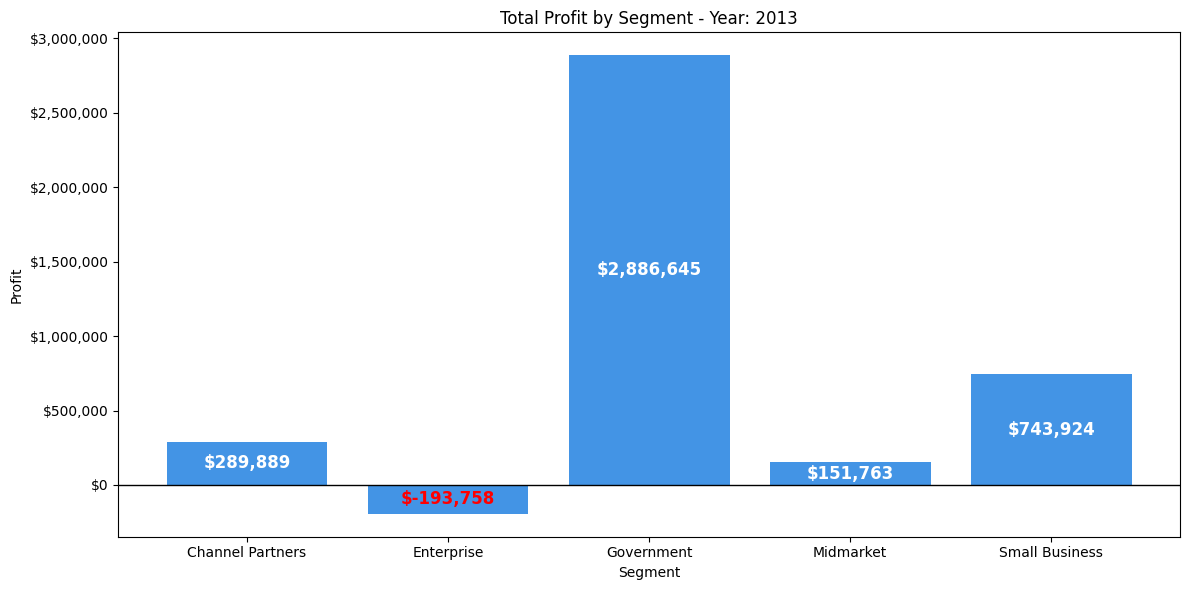

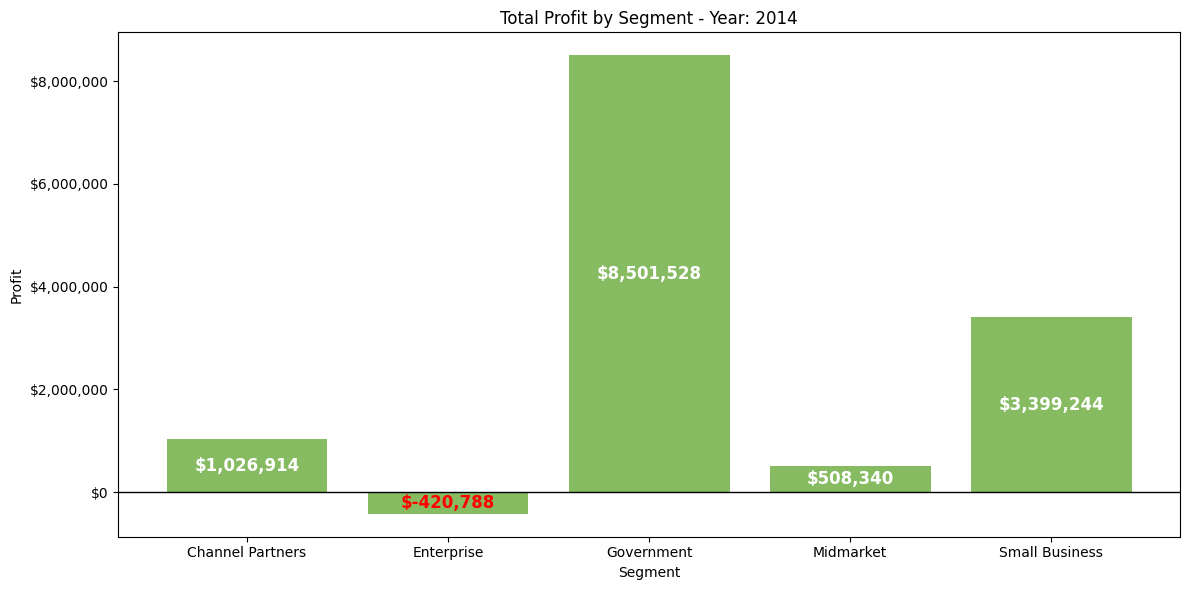

In [55]:
# Preparing the numeric profit values for plotting
df_profit_2013_plot = df[df['Year'] == 2013].groupby('Segment').agg({'Profit': 'sum'}).reset_index()
df_profit_2014_plot = df[df['Year'] == 2014].groupby('Segment').agg({'Profit': 'sum'}).reset_index()

# Plot for 2013
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_profit_2013_plot['Segment'], df_profit_2013_plot['Profit'], color='#4394E5')
ax.set_ylabel('Profit')
ax.set_xlabel('Segment')
ax.set_title('Total Profit by Segment - Year: 2013')
ax.axhline(0, color='black', linewidth=1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Adding money labels inside the bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'${height:,.0f}',
        ha='center',
        va='center',
        color='white' if height > 0 else 'red',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Plot for 2014
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(df_profit_2014_plot['Segment'], df_profit_2014_plot['Profit'], color='#87BB62')
ax.set_ylabel('Profit')
ax.set_xlabel('Segment')
ax.set_title('Total Profit by Segment - Year: 2014')
ax.axhline(0, color='black', linewidth=1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Adding money labels inside the bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'${height:,.0f}',
        ha='center',
        va='center',
        color='white' if height > 0 else 'red',
        fontsize=12,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

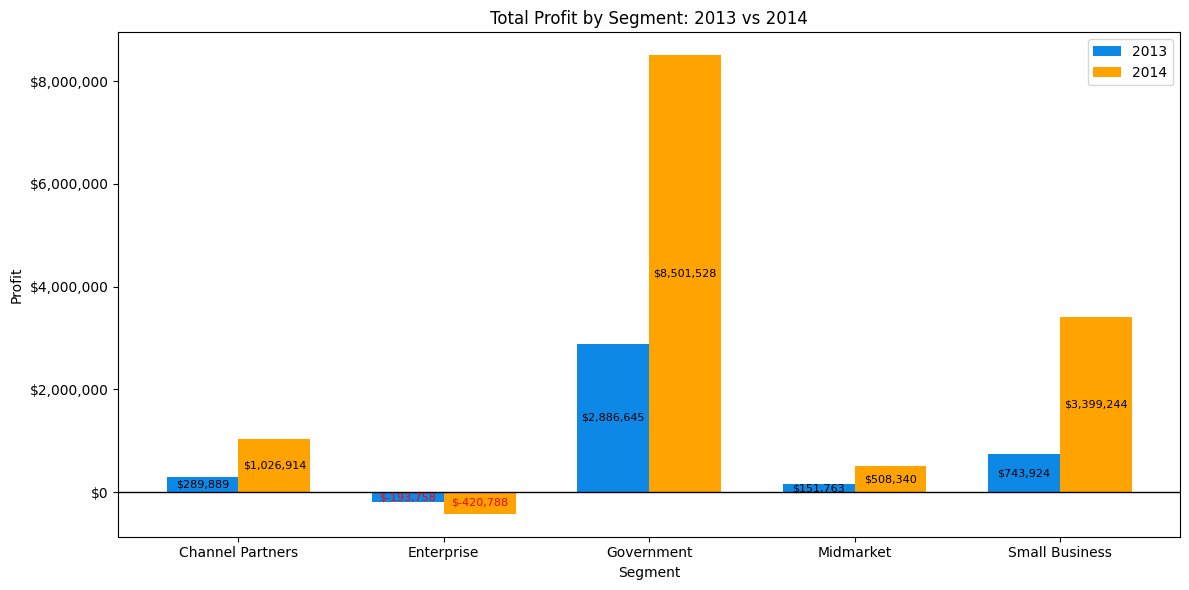

In [56]:
# Preparing the data for a grouped bar chart
segments = df_profit_2013_plot['Segment']
profit_2013 = df_profit_2013_plot['Profit']
profit_2014 = df_profit_2014_plot['Profit']

x = np.arange(len(segments))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, profit_2013, width, label='2013', color='#0d88e6')
bars2 = ax.bar(x + width/2, profit_2014, width, label='2014', color='#ffa300')

ax.set_xlabel('Segment')
ax.set_ylabel('Profit')
ax.set_title('Total Profit by Segment: 2013 vs 2014')
ax.set_xticks(x)
ax.set_xticklabels(segments)
ax.axhline(0, color='black', linewidth=1)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax.legend()

# Adding the labels inside the bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height / 2,
            f'${height:,.0f}',
            ha='center',
            va='center',
            color='black' if height > 0 else 'red',
            fontsize=8
        )

plt.tight_layout()
plt.show()


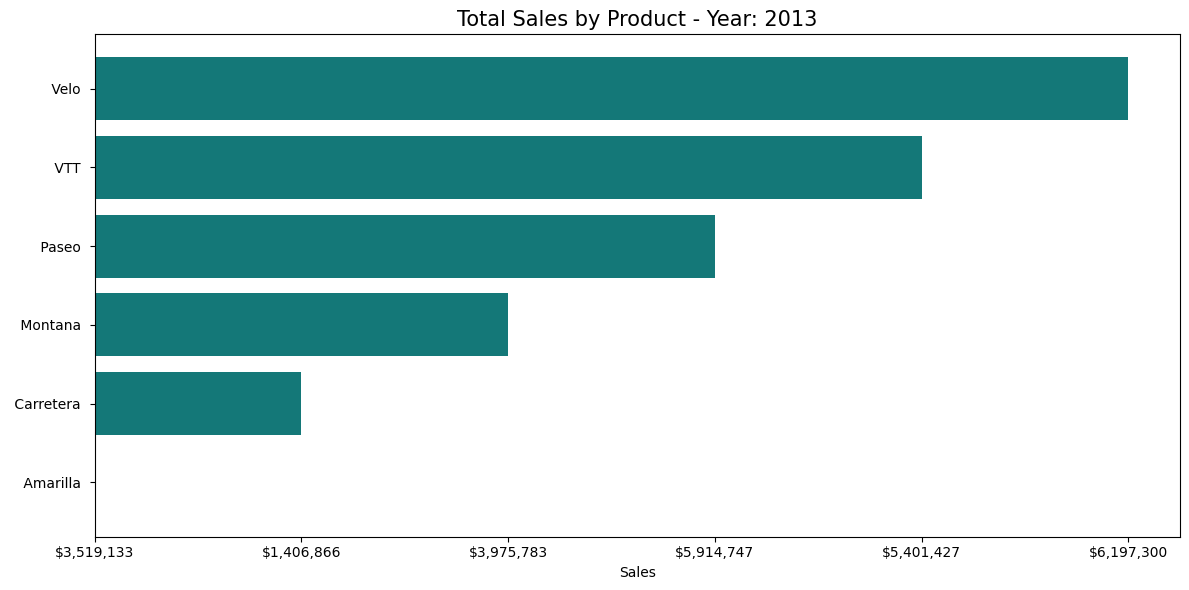

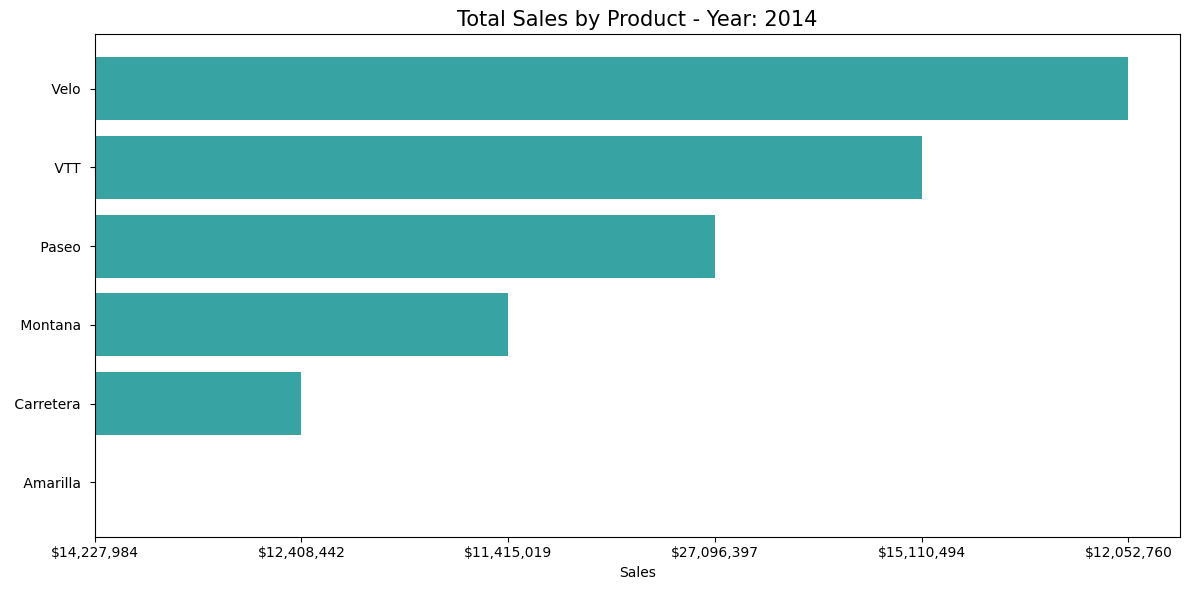

In [57]:
# Filtering the dataframe for 2013 and 2014 sales
df_sales_2013 = df[df['Year'] == 2013].groupby('Product').agg({'Sales': 'sum'}).reset_index()
df_sales_2014 = df[df['Year'] == 2014].groupby('Product').agg({'Sales': 'sum'}).reset_index()

# Formating the sales values for better readability
df_sales_2013['Sales'] = df_sales_2013['Sales'].apply(lambda x: '${:,.0f}'.format(x))
df_sales_2014['Sales'] = df_sales_2014['Sales'].apply(lambda x: '${:,.0f}'.format(x))

# Creating the horizontal bar chart for 2013
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2013['Product'], df_sales_2013['Sales'], color='#147878')

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_title('Total Sales by Product - Year: 2013', size=15)
plt.tight_layout()
plt.show()

# Create the horizontal bar chart for 2014
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2014['Product'], df_sales_2014['Sales'], color='#37A3A3')

# Add images to the end of each bar
for bar, country in zip(bars, df_sales_2014['Product']):
    if country in country_images:
        img_path = country_images[country]
        img = Image.open(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                            frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_title('Total Sales by Product - Year: 2014',size=15)
plt.tight_layout()
plt.show()


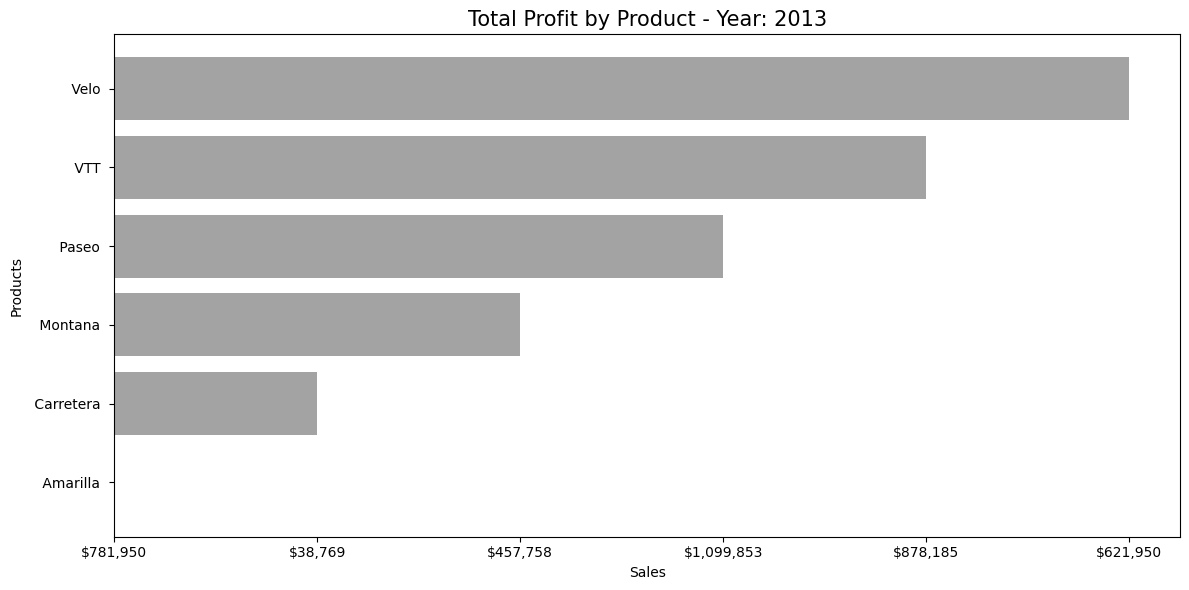

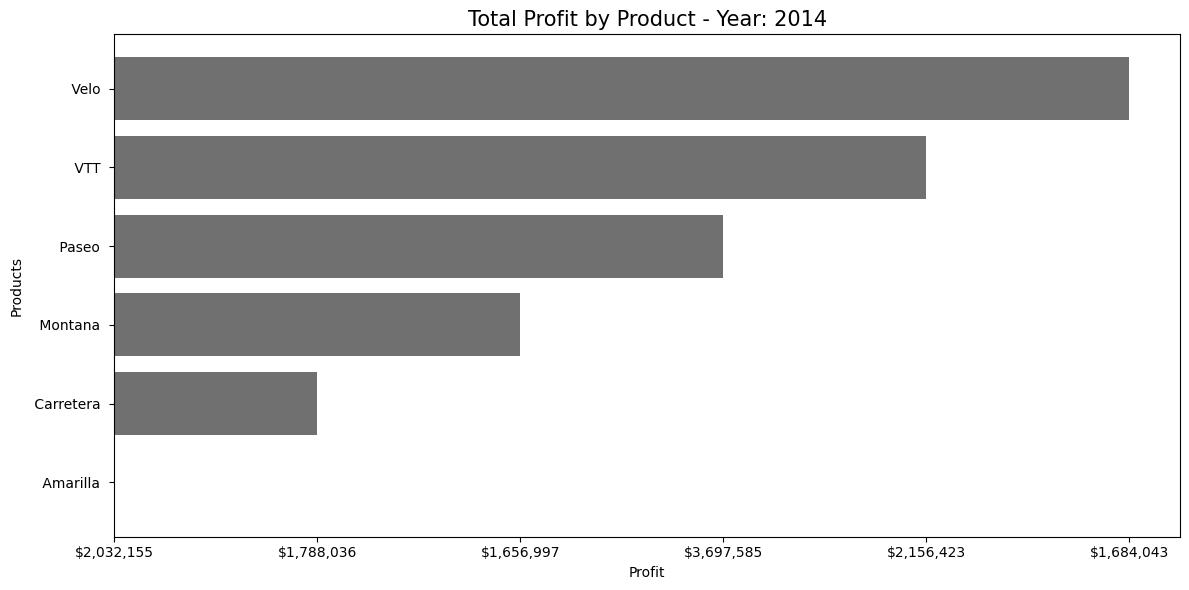

In [58]:
# Filtering the dataframe for 2013 and 2014 sales
df_profit_2013 = df[df['Year'] == 2013].groupby('Product').agg({'Profit': 'sum'}).reset_index()
df_profit_2014 = df[df['Year'] == 2014].groupby('Product').agg({'Profit': 'sum'}).reset_index()

# Formating the sales values for better readability
df_profit_2013['Profit'] = df_profit_2013['Profit'].apply(lambda x: '${:,.0f}'.format(x))
df_profit_2014['Profit'] = df_profit_2014['Profit'].apply(lambda x: '${:,.0f}'.format(x))

# Creating the horizontal bar chart for 2013
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_profit_2013['Product'], df_profit_2013['Profit'], color='#A3A3A3')

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Sales')
ax.set_ylabel('Products')
ax.set_title('Total Profit by Product - Year: 2013', size=15)
plt.tight_layout()
plt.show()

# Creating the horizontal bar chart for 2014
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(df_sales_2014['Product'], df_profit_2014['Profit'], color='#707070')

# Add images to the end of each bar
for bar, country in zip(bars, df_profit_2014['Product']):
    if country in country_images:
        img_path = country_images[country]
        img = Image.open(img_path)
        imagebox = OffsetImage(img, zoom=0.15)  # Adjust zoom as needed
        ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                            frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)

# Set X-axis to start at 0
ax.set_xlim(left=0)

# Add labels and title
ax.set_xlabel('Profit')
ax.set_ylabel('Products')
ax.set_title('Total Profit by Product - Year: 2014', size=15)
plt.tight_layout()
plt.show()


In [59]:
# Grouping by Country and sum Gross_Sales
df_gross_sales_country = df.groupby('Country')['Gross_Sales'].sum().reset_index()

# Defining a color for each country
bar_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot using Plotly
fig = px.bar(
    df_gross_sales_country,
    x='Country',
    y='Gross_Sales',
    title='Total Gross Sales by Country',
    labels={'Gross_Sales': 'Gross Sales'},
    color='Country',  # Use Country for color mapping
    color_discrete_sequence=bar_colors
)
fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_tickprefix='$',
    yaxis_separatethousands=True,
    title_font_size=24,
    title_font_family='Arial',
    title_font_color='black',
    title_font=dict(size=24, family='Arial', color='black'),
    margin=dict(l=60, r=60, t=80, b=60)  # Add padding
)
fig.show()


In [60]:
# Grouping by Year and Product, summing Profit
df_profit_trend = df.groupby(['Product'])['Profit'].sum().reset_index()

# Creating the figure
fig = go.Figure()

# Adding a line for each product
for product in df_profit_trend['Product'].unique():
    product_data = df_profit_trend[df_profit_trend['Product'] == product]
    fig.add_trace(go.Scatter(
        x=product_data['Product'],
        y=product_data['Profit'],
        mode='lines+markers',
        name=product
    ))

# Update layout
fig.update_layout(
    title='Yearly Profit Trend by Product',
    xaxis_title='Product',
    yaxis_title='Profit ($)',
    hovermode='x unified',
    legend_title='Product'
)

fig.show()


In [61]:
# Summarizing the total number of products sold per country
# Grouping by Country and Product, then sum Units_Sold
df_products_sold = df.groupby(['Country', 'Product'])['Units_Sold'].sum().reset_index()
df_products_sold = df_products_sold.rename(columns={'Units_Sold': 'Total_Units_Sold'})
df_products_sold

,Country,Product,Total_Units_Sold
0,Canada,Amarilla,29232.0
1,Canada,Carretera,34804.0
2,Canada,Montana,31488.5
3,Canada,Paseo,78191.5
4,Canada,VTT,41248.5
5,Canada,Velo,32464.0
6,France,Amarilla,31603.0
7,France,Carretera,34056.0
8,France,Montana,31282.0
9,France,Paseo,71606.0


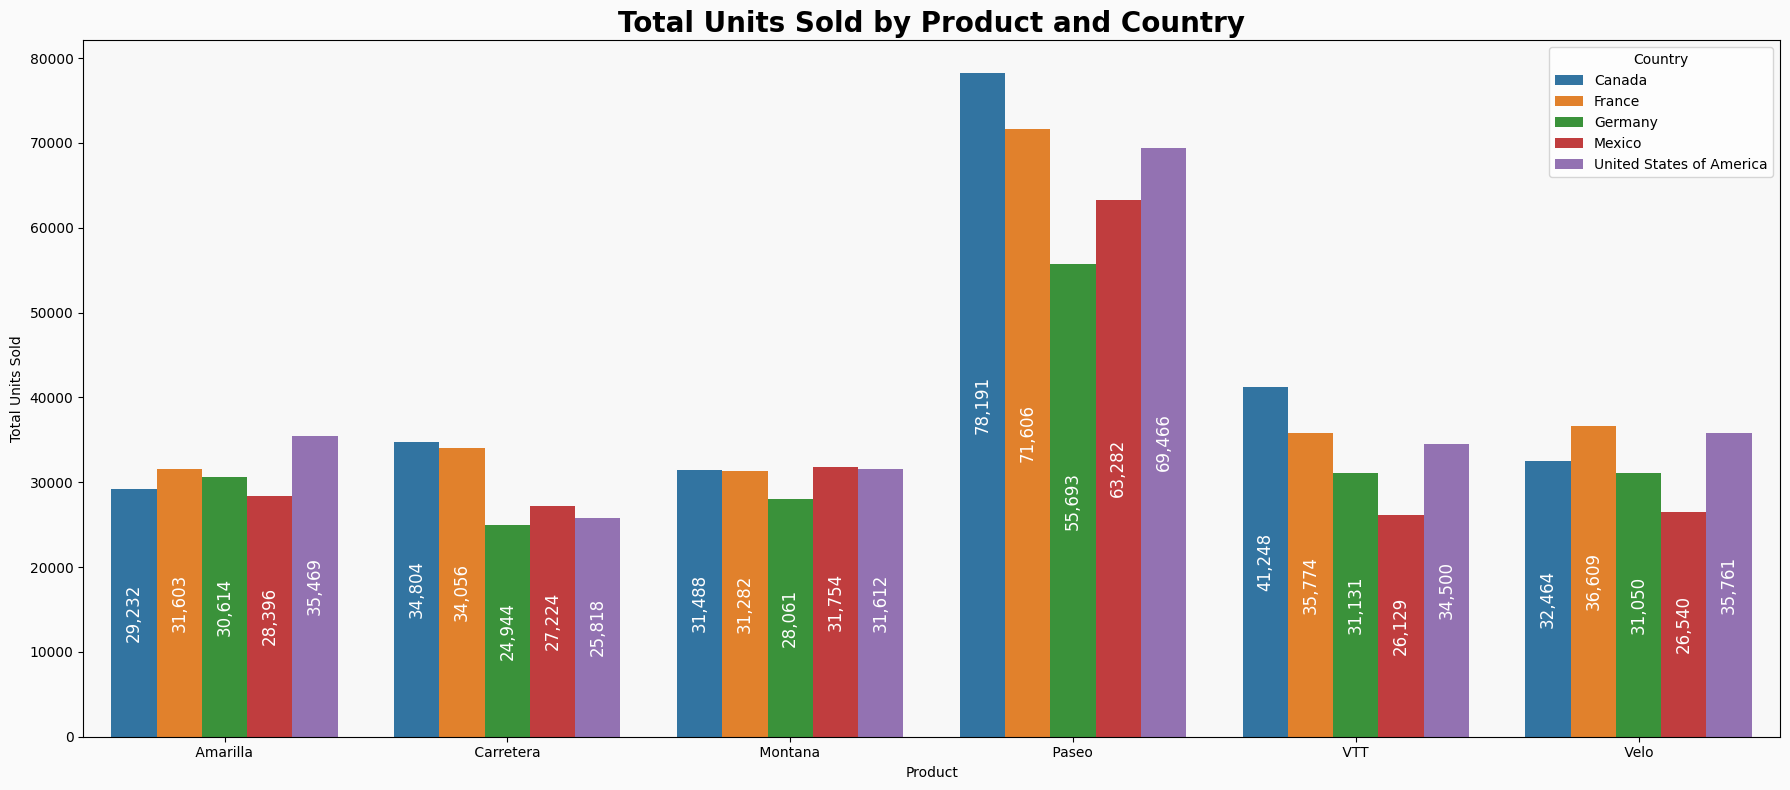

In [62]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(
    data=df_products_sold,
    x='Product',
    y='Total_Units_Sold',
    hue='Country',
    ax=ax
)

# Adding the labels inside the bars, vertically centered
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only label bars with height > 0
        ax.text(
            p.get_x() + p.get_width() / 2,
            height / 2,
            f'{int(height):,}',  # Format with commas for thousands
            ha='center',
            va='center',
            rotation=90,
            color='white' if height > 10 else 'black',  # Change text color based on height
            fontsize=12
        )
ax.set_facecolor('#F8F8F8')
fig.patch.set_facecolor('#FAFAFA')
ax.set_xlabel('Product')
ax.set_ylabel('Total Units Sold')
ax.set_title('Total Units Sold by Product and Country', fontsize=20, fontweight='bold')
ax.legend(title='Country')
plt.tight_layout()
plt.show()

In [63]:
df_info_discount_band = df.groupby('Discount_Band').size().reset_index(name='Count')
df_info_discount_band

,Discount_Band,Count
0,High,245
1,Low,160
2,Medium,242
3,None,53


In [64]:
df_info_segment = df.groupby('Product')['Units_Sold'].sum().reset_index(name='Sum')
df_info_segment

,Product,Sum
0,Amarilla,155315.0
1,Carretera,146846.0
2,Montana,154198.0
3,Paseo,338239.5
4,VTT,168783.0
5,Velo,162424.5


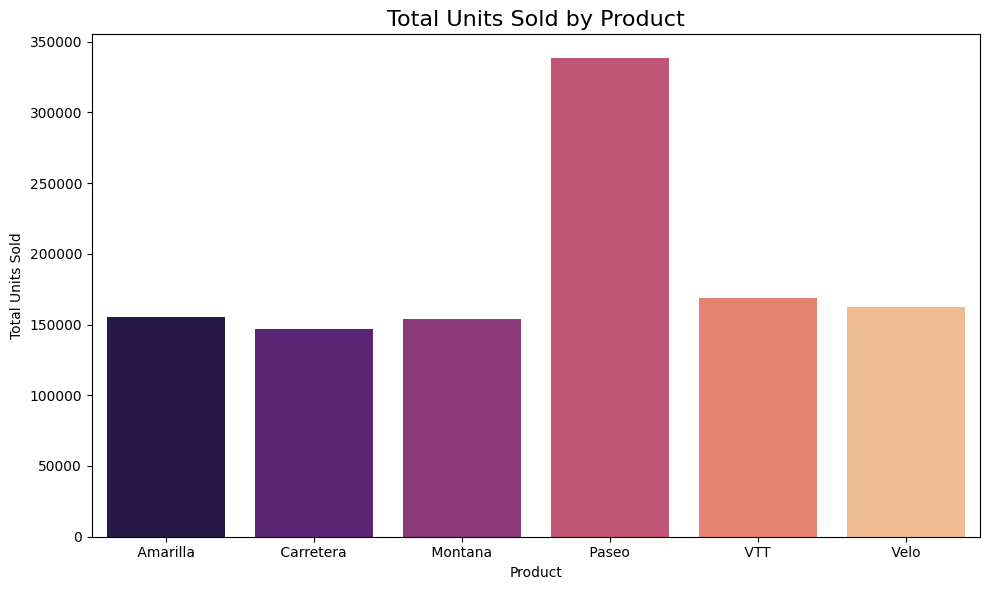

In [65]:
# Creating a bar chart with gradient color using seaborn

# We'll use df_info_segment for this example (Product vs Sum)

# Creating a color palette with a gradient
gradient_palette = sns.color_palette("magma", len(df_info_segment))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_info_segment,
    x='Product',
    y='Sum',
    hue='Product',
    palette=gradient_palette,
    ax=ax
)
ax.set_title('Total Units Sold by Product', fontsize=16)
ax.set_xlabel('Product')
ax.set_ylabel('Total Units Sold')
plt.tight_layout()
plt.show()

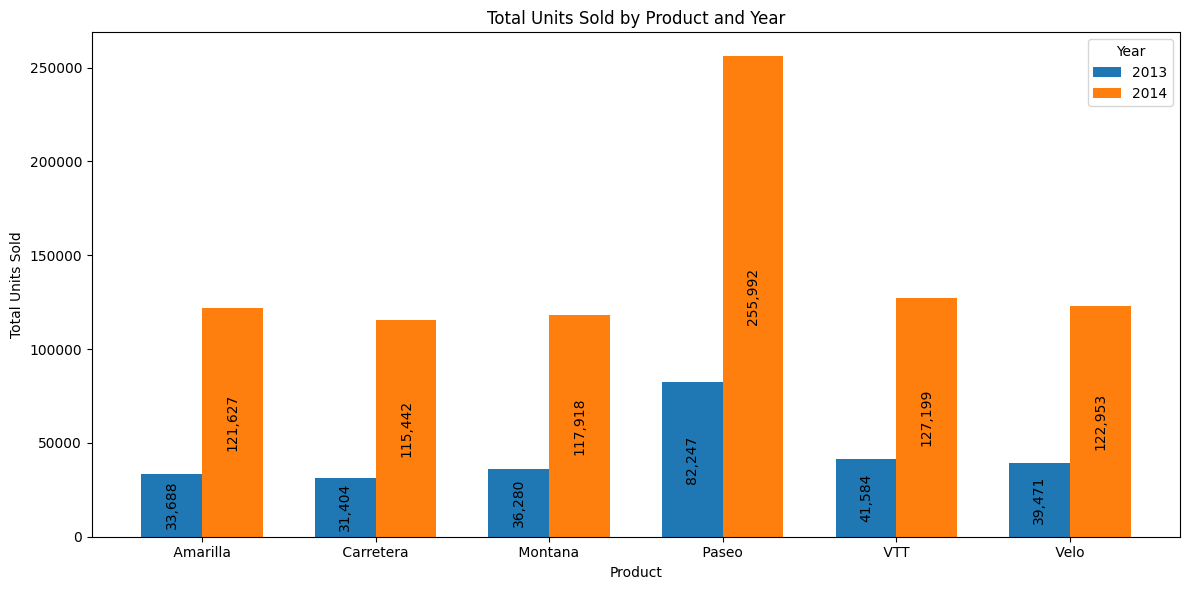

In [66]:
# Comparing the total units sold by product for each year using a grouped bar chart

# Grouping by Year and Product, sum Units_Sold
df_units_sold_year = df.groupby(['Year', 'Product'])['Units_Sold'].sum().reset_index()

# Pivot for plotting
df_units_sold_pivot = df_units_sold_year.pivot(index='Product', columns='Year', values='Units_Sold').fillna(0)

products = df_units_sold_pivot.index
years = df_units_sold_pivot.columns.values
x = np.arange(len(products))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))

bars = []
for i, year in enumerate(years):
    bars.append(
        ax.bar(
            x + i * bar_width,
            df_units_sold_pivot[year],
            bar_width,
            label=str(year)
        )
    )

# Adding the labels to each bar with the number of units sold
for i, year in enumerate(years):
    for j, product in enumerate(products):
        units = df_units_sold_pivot.loc[product, year]
        ax.text(
            x[j] + i * bar_width,
            units / 2,
            f'{int(units):,}',
            ha='center',
            va='center',
            rotation=90,
            color='black' if units > 0 else 'black',
            fontsize=10
        )

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(products)
ax.set_xlabel('Product')
ax.set_ylabel('Total Units Sold')
ax.set_title('Total Units Sold by Product and Year')
ax.legend(title='Year')
plt.tight_layout()
plt.show()

In [67]:
# Stripping the whitespace from Month_Name before grouping and categorizing
df['Month_Name'] = df['Month_Name'].str.strip()

# Creating a monthly summary of units sold
df_info_segment_monthly = df.groupby('Month_Name')['Units_Sold'].sum().reset_index(name='Sum')

# Reordering the months according to calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df_info_segment_monthly['Month_Name'] = pd.Categorical(df_info_segment_monthly['Month_Name'], categories=month_order, ordered=True)
df_info_segment_monthly = df_info_segment_monthly.sort_values('Month_Name').reset_index(drop=True)
df_info_segment_monthly

,Month_Name,Sum
0,January,67835.5
1,February,55115.0
2,March,53420.0
3,April,78886.5
4,May,51771.0
5,June,103302.0
6,July,69349.0
7,August,60705.0
8,September,107881.0
9,October,201104.0


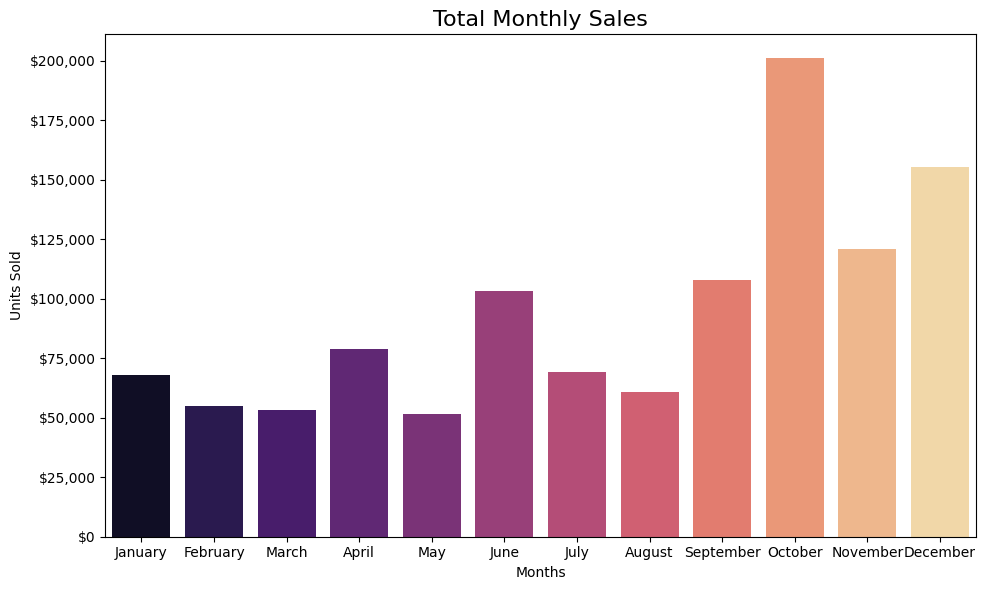

In [68]:
# Creating a gradient palette with 12 colors for 12 months
monthly_palette = sns.color_palette("magma", 12)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    data=df_info_segment_monthly,
    x='Month_Name',
    y='Sum',
    hue='Month_Name',
    palette=monthly_palette,
    ax=ax
)
ax.set_title('Total Monthly Sales', fontsize=16)
ax.set_xlabel('Months')
ax.set_ylabel('Units Sold')

# Defining the currency formatter for y-axis
currency_formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
ax.yaxis.set_major_formatter(currency_formatter)

plt.tight_layout()
plt.show()


In [69]:
# Grouping by Year and Month_Name, sum Sales
df_monthly_sales = df.groupby(['Year', 'Month_Name'])['Sales'].sum().reset_index()

# Ensuring that Month_Name is ordered correctly
df_monthly_sales['Month_Name'] = pd.Categorical(df_monthly_sales['Month_Name'], categories=month_order, ordered=True)
df_monthly_sales = df_monthly_sales.sort_values(['Year', 'Month_Name'])

# Pivot for plotting
monthly_sales_pivot = df_monthly_sales.pivot(index='Month_Name', columns='Year', values='Sales')

fig = go.Figure()
for year in years:
    fig.add_trace(go.Scatter(
        x=monthly_sales_pivot.index,
        y=monthly_sales_pivot[year],
        mode='lines+markers',
        name=str(year)
    ))

fig.update_layout(
    title='Monthly Sales per Year',
    xaxis_title='Month',
    yaxis_title='Sales in $',
    legend_title='Year'
)
fig.show()

In [70]:
# Grouping by Year and Month_Name, sum Profit
df_monthly_profit = df.groupby(['Year', 'Month_Name'])['Profit'].sum().reset_index()

# Ensuring that Month_Name is ordered correctly
df_monthly_profit['Month_Name'] = pd.Categorical(df_monthly_profit['Month_Name'], categories=month_order, ordered=True)
df_monthly_profit = df_monthly_profit.sort_values(['Year', 'Month_Name'])

# Pivot for plotting
monthly_profit_pivot = df_monthly_profit.pivot(index='Month_Name', columns='Year', values='Profit')

fig = go.Figure()
for year in years:
    fig.add_trace(go.Scatter(
        x=monthly_profit_pivot.index,
        y=monthly_profit_pivot[year],
        mode='lines+markers',
        name=str(year)
    ))

fig.update_layout(
    title='Monthly profit per Year',
    xaxis_title='Month',
    yaxis_title='profit in $',
    legend_title='Year'
)
fig.show()

In [71]:
# Finding the product with max and min total profit
product_profit = df.groupby('Product')['Profit'].sum()
max_profit_product = product_profit.idxmax()
min_profit_product = product_profit.idxmin()
max_profit_product_value = product_profit.max()
min_profit_product_value = product_profit.min()

# Finding the segment with max and min total profit
segment_profit = df.groupby('Segment')['Profit'].sum()
max_profit_segment = segment_profit.idxmax()
min_profit_segment = segment_profit.idxmin()
max_profit_segment_value = segment_profit.max()
min_profit_segment_value = segment_profit.min()

print(f"Product with max profit: {max_profit_product} (${max_profit_product_value:,.2f})")
print(f"Product with min profit: {min_profit_product} (${min_profit_product_value:,.2f})")
print(f"Segment with max profit: {max_profit_segment} (${max_profit_segment_value:,.2f})")
print(f"Segment with min profit: {min_profit_segment} (${min_profit_segment_value:,.2f})")

Product with max profit:  Paseo  ($4,797,437.96)
Product with min profit:  Carretera  ($1,826,804.89)
Segment with max profit: Government ($11,388,173.18)
Segment with min profit: Enterprise ($-614,545.62)


In [72]:
# Summarize key metrics into a single DataFrame for export

summary_data = {
    'Metric': [
        'Total Countries',
        'Total Products',
        'Total Segments',
        'Total Units Sold',
        'Total Gross Sales',
        'Total Sales',
        'Total Profit',
        'Min Profit Country',
        'Max Profit Country',
        'Max Profit Product',
        'Min Profit Product',
        'Max Profit Segment',
        'Min Profit Segment'
    ],
    'Value': [
        df['Country'].nunique(),
        df['Product'].nunique(),
        df['Segment'].nunique(),
        df['Units_Sold'].sum(),
        df['Gross_Sales'].sum(),
        df['Sales'].sum(),
        df['Profit'].sum(),
        min_profit_country,
        max_profit_country,
        max_profit_product,
        min_profit_product,
        max_profit_segment,
        min_profit_segment
    ]
}

df_summary = pd.DataFrame(summary_data)
df_summary

,Metric,Value
0,Total Countries,5
1,Total Products,6
2,Total Segments,5
3,Total Units Sold,1125806.0
4,Total Gross Sales,127931598.5
5,Total Sales,118726350.29
6,Total Profit,16893702.29
7,Min Profit Country,Mexico
8,Max Profit Country,France
9,Max Profit Product,Paseo
